In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
def plotagraficos (opiniao,modelo):
  f,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(15,5))
  ax1.set_title(label=modelo)
  ax1.scatter(DadosTreino['x'],DadosTreino['y'],c=opiniao,cmap="rainbow")
  ax2.set_title("Original")
  ax2.scatter(DadosTreino['x'],DadosTreino['y'],c=dados['label'],cmap="rainbow")


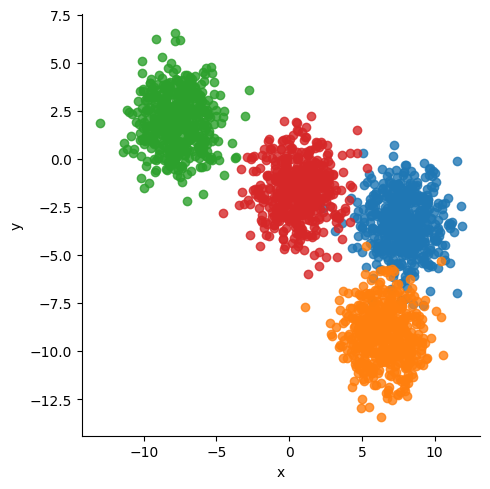

             x          y  label
0     8.368840  -1.990823      0
1    -8.359789   4.707319      2
2    -0.536354  -0.166747      3
3    -7.303907   3.821814      2
4     6.075925  -3.773375      0
...        ...        ...    ...
1995 -9.186361   1.562690      2
1996  6.004900 -10.082238      1
1997 -8.714941   5.288470      2
1998 -8.569944   1.355440      2
1999  8.286097  -3.232417      0

[2000 rows x 3 columns]
0       8.368840
1      -8.359789
2      -0.536354
3      -7.303907
4       6.075925
          ...   
1995   -9.186361
1996    6.004900
1997   -8.714941
1998   -8.569944
1999    8.286097
Name: x, Length: 2000, dtype: float64


In [3]:
dados = pd.read_csv("Base3.csv")
df_dados = pd.DataFrame(dados)
sns.lmplot( x="x", y="y", data=df_dados, fit_reg=False, hue='label', legend=False)
plt.show()
print(df_dados)
print(df_dados['x'])

Modelo de regressão linear múltipla

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


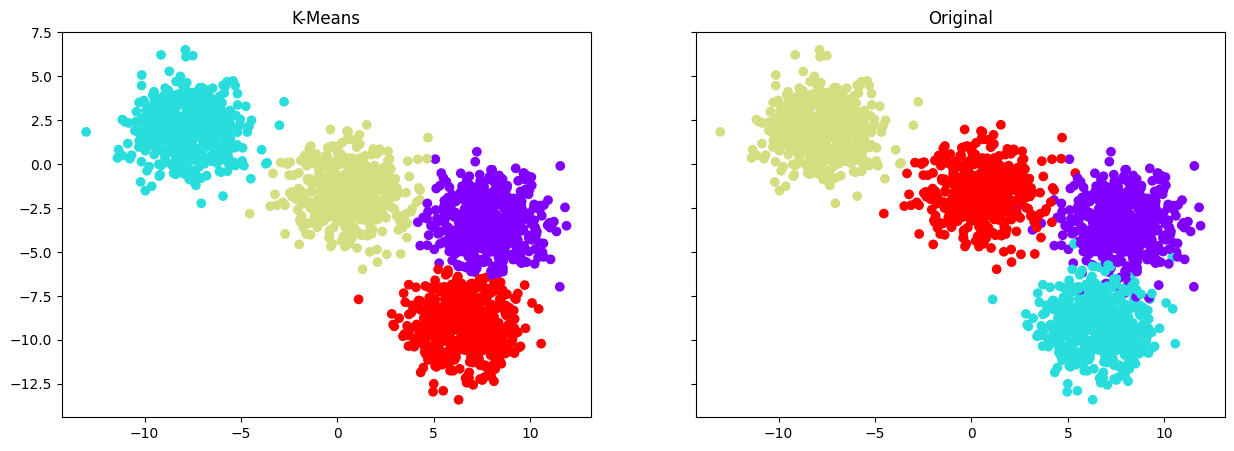

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters=4, max_iter=100,random_state=15)
DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
kmeans.fit(DadosTreino)
X = kmeans.labels_
plotagraficos(X,'K-Means')


Avaliando os clusters gerados

In [19]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",kmeans.inertia_)

print("\nCoesão: ",math.sqrt(kmeans.inertia_)/kmeans.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,kmeans.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],kmeans.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],kmeans.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],kmeans.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], kmeans.labels_))




Soma dos quadrados das distâncias até o centróide mais próximo:  8167.7900329429895

Coesão:  22.593956649045268

Coeficiente de Silhueta:  0.6228715418520678

Rand Score K-means:  0.9872516258129065

Homogeneidade :  0.9515607555867713

Completude :  0.9515635012259817

Matriz de contingência kmeans
 [[486   0   4  10]
 [ 10   0   0 490]
 [  0 500   0   0]
 [  2   0 498   0]]


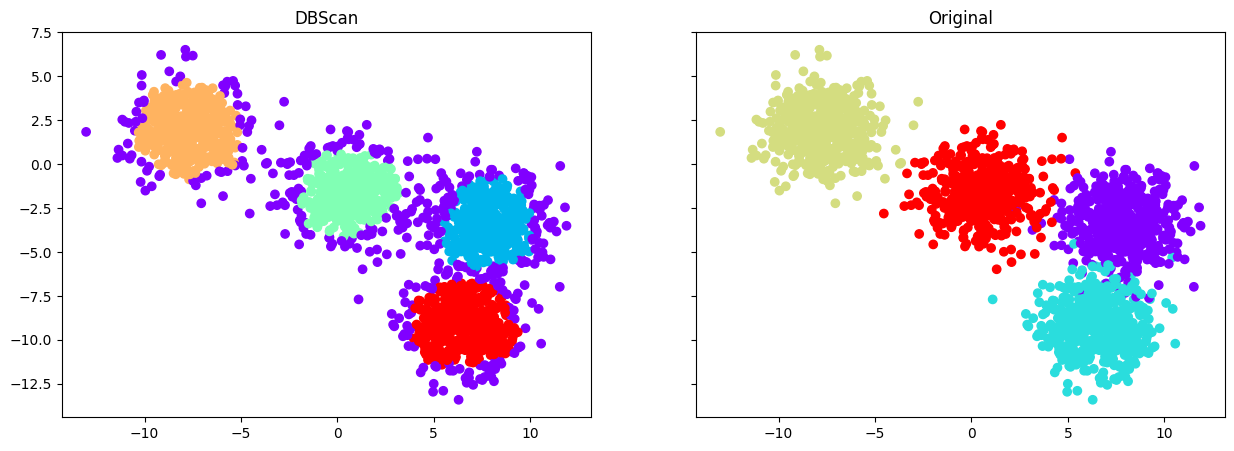

In [43]:
from sklearn.cluster import DBSCAN

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
db = DBSCAN(eps=0.7, min_samples=25)
db.fit(DadosTreino)
X = db.labels_
plotagraficos(X,'DBScan')

In [45]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",db.inertia_)

print("\nCoesão: ",math.sqrt(db.inertia_)/db.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,db.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],db.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],db.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],db.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], db.labels_))


Rand Score K-means:  0.8903636818409204

Homogeneidade :  0.7891232552119606

Completude :  0.6802014370932807

Matriz de contingência kmeans
 [[117 377   1   0   5]
 [ 92   3   0   0 405]
 [ 67   0   0 433   0]
 [115   0 385   0   0]]


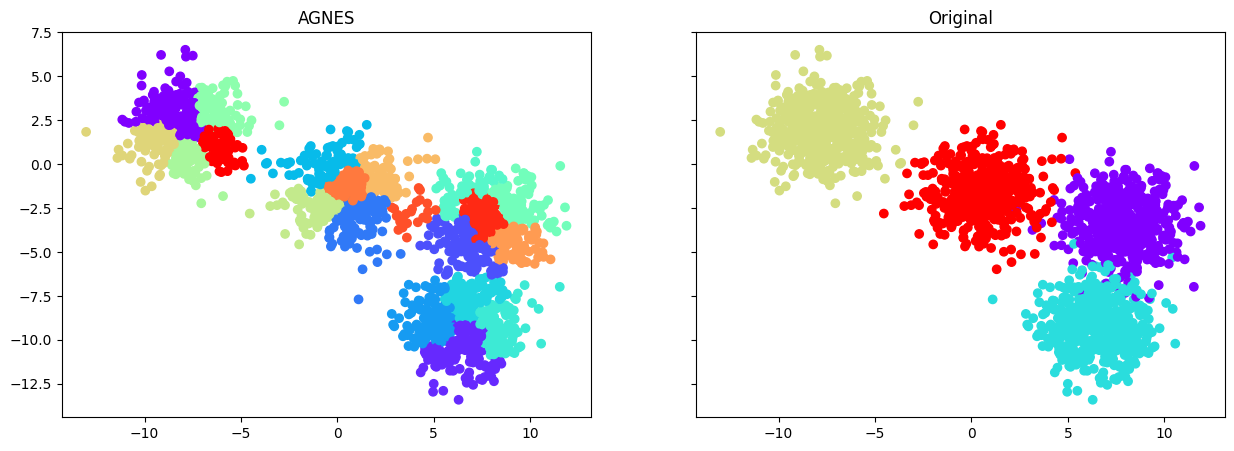

In [58]:
from sklearn.cluster import AgglomerativeClustering

DadosTreino = pd.DataFrame(dados,columns=dados.columns[:-1])
Agnes = AgglomerativeClustering(n_clusters=20,linkage='ward')
Agnes.fit(DadosTreino)
X = Agnes.labels_
plotagraficos(X,'AGNES')

In [59]:
from sklearn.metrics.cluster import contingency_matrix
from scipy.stats import entropy
import math

#print("\nSoma dos quadrados das distâncias até o centróide mais próximo: ",Agnes.inertia_)

#print("\nCoesão: ",math.sqrt(Agnes.inertia_)/Agnes.n_clusters)

print("\nCoeficiente de Silhueta: ",metrics.silhouette_score(DadosTreino,Agnes.labels_))

print("\nRand Score K-means: ",metrics.rand_score(dados['label'],Agnes.labels_))

print("\nHomogeneidade : ",metrics.homogeneity_score(dados['label'],Agnes.labels_))

print("\nCompletude : ",metrics.completeness_score(dados['label'],Agnes.labels_))

print("\nMatriz de contingência kmeans\n", contingency_matrix(dados['label'], Agnes.labels_))


Coeficiente de Silhueta:  0.2968642151165107

Rand Score K-means:  0.8012516258129064

Homogeneidade :  0.9500059677054605

Completude :  0.4472471947261143

Matriz de contingência kmeans
 [[  0   0 111   1   0   0   7   3  56  90   0   0   0   0   1  95   0   8
  128   0]
 [  0 144  12   1 138   0 106  98   0   0   0   0   0   0   0   1   0   0
    0   0]
 [163   0   0   0   0   4   0   0   0   0  93  80   0  89   0   0   0   0
    0  71]
 [  0   0   0 111   0  86   0   0   1   0   0   0  85   0  87   0 113  17
    0   0]]
